<a href="https://colab.research.google.com/github/Matiak/TOI/blob/main/TOI2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Druhy TOI projekt
# Autor sablony: Jan Beran, 2023
# Jmeno resitele/resitelky: Martin Babača
# xlogin:   xbabac02


# Zde si pripadne pridejte vlastni importy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # možná se vám bude hodit pro statistické testy


In [3]:
t_avg = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_avg.csv")
t_min = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_min.csv")
t_max = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_max.csv")
rain = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/rain.csv")
wind = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/wind.csv")
air = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/Kvalita_ovzdusi___Air_quality.csv")

# Pokud by začaly odkazy výše vykazovat problémy s dostupností:
# 1) Stáhněte si zálohu dat z https://drive.google.com/drive/folders/12MjA3NTgHtssvzIPKFEEptwVTxOmhV1s?usp=sharing 
# 2) Nahrajte data do runtime
# 3) Změňte odkazy výše na lokální cesty
# 4) Opakujte pokaždé, když se resetuje runtime - otevření a zavření souboru atp.
# 5) Dejte mi vědět a já soubory nahraju někam jinam, abyste je nemuseli pokaždé ručně nahrávat do runtime

# Prostor pro váš kód

#Část 1: Deskriptivní analýza

Budete pracovat se soubory:
* **T_avg.csv**: průměrná teplota v ˚C
* **T_min.csv**: minimální teplota v ˚C
* **T_max.csv**: maximální teplota v ˚C
* **rain.csv**: úhrn srážek v mm
* **wind.csv**: rychlost větru v m/s
* **Kvalita_ovzduší___Air_quality.csv**: různá data, měřeno v µg/m³

  **no2_1h** : Hodnota NO2 - oxidu dusičitého, updatováno každou hodinu

  **pm10_1h**: Koncentrace polétavého prachu do 10um (pyl, standardní prach), updatováno jednou za hodinu
  
  **pm2_5_1h**: Koncentrace polétavého prachu do 2.5um (výfukové plyny, organické látky…) updatováno jednou za hodinu

Ve všech souborech kromě posledního je vždy jen jeden údaj. V posledním (soubor **Kvalita_ovzduší___Air_quality.csv**, data v proměnné **air**) je údajů opravdu velké množství, vy se ovšem zaměřte na měření označená jako no2_1h, pm10_1h a pm2_5_1h. Dávejte si přitom pozor, abyste vyfiltrovali opravdu jen relevantní data (tedy pro stanici Brno-Tuřany). V ostatních datasetech jsou data pouze z této stanice. Celkem tedy budete mít k dispozici 8 datasetů.

### Tabulka pro základní údaje o každém z osmi datasetů:
Ke každé tabulce navíc uveďte, jak budete daná data upravovat.

|Název charakteristiky | Hodnota
|----------------------|--------
|**Jméno datasetu**    |(např. "průměrná teplota" -- ta je uložena v souboru T_avg.csv)   
|**Rozsah a četnost** | od kdy do kdy a jak často probíhala měření
|**Maximum**           |
|**Minimum**           | 
|**Aritmetický průměr**|
|**Popis dat, co bude třeba upravit**         |Jsou data kompletní nebo některé hodnoty chybí? Jak bude třeba data upravit?

### Prostor pro vaše hypotézy:
Např: Domnívám se, že zde bude existovat vztah mezi datasety pm10_1h a pm2_5_1h, jelikož oba datasety určují množství polétavých částic. Pokud (např. v důsledku deště) poklesne hodnota jednoho údaje, měla by poklesnout i hodnota druhého údaje. 

t_avg
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596      9.402343
min     1961.000000      1.000000      1.00000    -19.900000
max     2022.000000     12.000000     31.00000     30.800000


<Axes: ylabel='Frequency'>

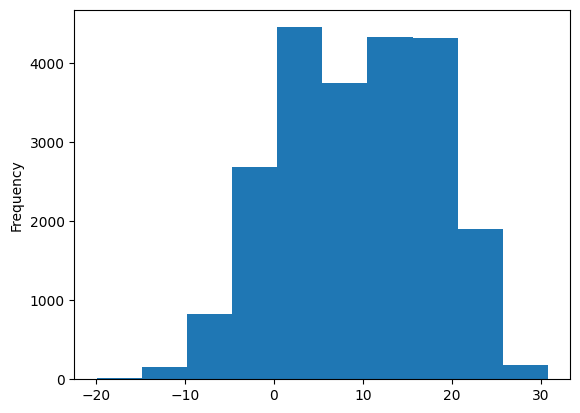

In [59]:
print("t_avg")
t_avg_GF = pd.melt(t_avg,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
t_avg_GF = t_avg_GF.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
t_avg_GF['day'] = t_avg_GF['day'].astype(int)
t_avg_GF['date'] = pd.to_datetime(t_avg_GF[['year','month','day']], errors='coerce')
t_avg_GF = t_avg_GF[pd.notnull(t_avg_GF['date'])]
print(t_avg_GF[['date']].sort_values('date', ascending = True).head(1))
print(t_avg_GF[['date']].sort_values(['date'], ascending = [False]).head(1))
print(t_avg_GF.loc[t_avg_GF.isna().any(axis=1)])
print(t_avg_GF.dropna().describe().loc[['count','mean','min','max']])
t_avg_GF['value'].plot.hist()

### Dataset t_avg

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | priemerná denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 30.8 ˚C
|**Minimum**           | -19.9 ˚C
|**Aritmetický průměr**| 9.402343 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.

In [34]:
print("t_min")
t_min_GF = pd.melt(t_min,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
t_min_GF = t_min_GF.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
t_min_GF['day'] = t_min_GF['day'].astype(int)
t_min_GF['date'] = pd.to_datetime(t_min_GF[['year','month','day']], errors='coerce')
t_min_GF = t_min_GF[pd.notnull(t_min_GF['date'])]
print(t_min_GF[['date']].sort_values('date', ascending = True).head(1))
print(t_min_GF[['date']].sort_values(['date'], ascending = [False]).head(1))
print(t_min_GF.loc[t_min_GF.isna().any(axis=1)])
print(t_min_GF.dropna().describe().loc[['count','mean','min','max']])
t_min_GF['value'].plot.hist()

t_min
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596      5.027042
min     1961.000000      1.000000      1.00000    -24.100000
max     2022.000000     12.000000     31.00000     24.200000


### Dataset t_min

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | minimálna denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 24.2 ˚C
|**Minimum**           | -24.1 ˚C
|**Aritmetický průměr**| 5.027042 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.

In [35]:
print("t_max")
t_max_GF = pd.melt(t_max,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
t_max_GF = t_max_GF.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
t_max_GF['day'] = t_max_GF['day'].astype(int)
t_max_GF['date'] = pd.to_datetime(t_max_GF[['year','month','day']], errors='coerce')
t_max_GF = t_max_GF[pd.notnull(t_max_GF['date'])]
print(t_max_GF[['date']].sort_values('date', ascending = True).head(1))
print(t_max_GF[['date']].sort_values(['date'], ascending = [False]).head(1))
print(t_max_GF.loc[t_max_GF.isna().any(axis=1)])
print(t_max_GF.dropna().describe().loc[['count','mean','min','max']])
t_max_GF['value'].plot.hist()

t_max
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596     13.924131
min     1961.000000      1.000000      1.00000    -16.700000
max     2022.000000     12.000000     31.00000     37.800000


### Dataset t_max

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | maximálna denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 37.8 ˚C
|**Minimum**           | -16.7 ˚C
|**Aritmetický průměr**| 13.924131 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.

In [36]:
print("rain")
rain_GF = pd.melt(rain,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
rain_GF = rain_GF.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
rain_GF['day'] = rain_GF['day'].astype(int)
rain_GF['date'] = pd.to_datetime(rain_GF[['year','month','day']], errors='coerce')
rain_GF = rain_GF[pd.notnull(rain_GF['date'])]
print(rain_GF[['date']].sort_values('date', ascending = True).head(1))
print(rain_GF[['date']].sort_values(['date'], ascending = [False]).head(1))
print(rain_GF.loc[rain_GF.isna().any(axis=1)])
print(rain_GF.dropna().describe().loc[['count','mean','min','max']])
rain_GF['value'].plot.hist()

rain
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20821  2022      2   28    NaN 2022-02-28
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
             year         month           day         value
count  22638.0000  22638.000000  22638.000000  22638.000000
mean    1991.4909      6.523854     15.725417      1.373059
min     1961.0000      1.000000      1.000000      0.000000
max     2022.0000     12.000000     31.000000     82.100000


### Dataset rain

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | úhrn zrážok \[mm\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 82.1 ˚C
|**Minimum**           | 0.0 ˚C
|**Aritmetický průměr**| 1.373059 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 28.2.2022 a 31.5.2022.

In [37]:
print("wind")
wind_GF = pd.melt(wind,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
wind_GF = wind_GF.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
wind_GF['day'] = wind_GF['day'].astype(int)
wind_GF['date'] = pd.to_datetime(wind_GF[['year','month','day']], errors='coerce')
wind_GF = wind_GF[pd.notnull(wind_GF['date'])]
print(wind_GF[['date']].sort_values('date', ascending = True).head(1))
print(wind_GF[['date']].sort_values(['date'], ascending = [False]).head(1))
print(wind_GF.loc[wind_GF.isna().any(axis=1)])
print(wind_GF.dropna().describe().loc[['count','mean','min','max']])
wind_GF['value'].plot.hist()

wind
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22279  2019      8   30    NaN 2019-08-30
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month           day         value
count  22638.000000  22638.000000  22638.000000  22638.000000
mean    1991.491033      6.523589     15.725329      3.472193
min     1961.000000      1.000000      1.000000      0.000000
max     2022.000000     12.000000     31.000000     17.300000


### Dataset wind

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | rýchlosť vetra \[m/s\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 17.3 ˚C
|**Minimum**           | 0.0 ˚C
|**Aritmetický průměr**| 3.472193 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 30.8.2019 a 31.5.2022.

wind
no2_1h
       objectid   code         name owner              actualized  no2_1h  \
29        51592  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/09 15:37:45+00     NaN   
126       51689  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 01:37:48+00     NaN   
154       51717  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 04:37:51+00     NaN   
249       51812  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 13:37:57+00     NaN   
474       52037  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/11 12:38:11+00     NaN   
...         ...    ...          ...   ...                     ...     ...   
67323    118886  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/05 23:43:25+00     NaN   
67537    119100  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/06 22:43:27+00     NaN   
67729    119292  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/07 21:43:29+00     NaN   
67927    119490  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/08 20:43:56+00     NaN   
68040    119603  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/09 12:43:56+00     NaN   

       pm10_1h  pm2_5_1h                                globali

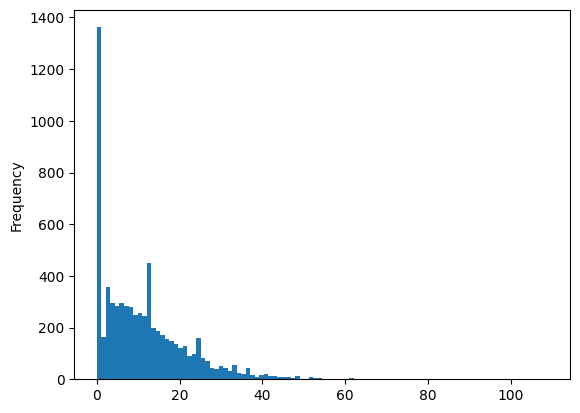

In [72]:
print("wind")
#print(air.head())
air_GF = air[air['name']=='Brno-Tuřany']
del air_GF['X']
del air_GF['Y']
del air_GF['lat']
del air_GF['lon']
del air_GF['so2_1h']
del air_GF['co_8h']
del air_GF['pm10_24h']
del air_GF['o3_1h']
print("no2_1h")
print(air_GF[air_GF['no2_1h'].isna()])
print("pm10_1h")
print(air_GF[air_GF['pm10_1h'].isna()])
print("pm2_5_1h")
print(air_GF[air_GF['pm2_5_1h'].isna()])
print("no2_1h && pm10_1h")
print(air_GF[air_GF[['no2_1h','pm10_1h']].isna().all(axis=1)])
print("summary")
print(air_GF.describe())
#air_GF['no2_1h'].plot.hist(bins=100)
#air_GF['pm10_1h'].plot.hist(bins=100)
air_GF['pm2_5_1h'].plot.hist(bins=100)
print(air_GF[['actualized']].sort_values('actualized', ascending = True).head(1))
print(air_GF[['actualized']].sort_values(['actualized'], ascending = [False]).head(1))

## Dataset Kvalita_ovzduší___Air_quality.csv
### Dataset no2_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Hodnota NO2
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 75.8
|**Minimum**           | 1.0
|**Aritmetický průměr**| 13.054245
|**Popis dat, co bude třeba upravit**         | Dáta musia byť vytriedené len pre miesto Brno-Tuřany.<br>Dáta sú zaznamenávané po hodine a je nutné ich agregovať na jednu hodnotu denne aby bolo možné použiť ich v kombinácií s ostanými datasetmi.<br>

### Dataset pm10_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Koncentrácia polietavého prachu do 10um (peľ, štandardný prach)
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 331.0
|**Minimum**           | 1.0
|**Aritmetický průměr**| 17.488028
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 30.8.2019 a 31.5.2022.

### Dataset pm2_5_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Koncentrácia polietavého prachu do 2.5um (výfukové plyny, organické látky …)
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 109.0
|**Minimum**           | 0.0
|**Aritmetický průměr**| 11.255967
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci. Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu. Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty. Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 30.8.2019 a 31.5.2022.

# Část 2: Příprava dat

V této části realizujete úpravu dat, kterou jste si navrhli v předchozí části. Detailní zadání je k dispozici v souboru se zadáním. Pracujte efektivně, využívejte, co vám Python a  jeho knihovny nabízejí.

Nezapomeňte zodpovědět otázky ze zadání: Jak jste doplňovali chybějící data, jaký rozsah a četnost jste zvolili a jak jste data upravili. 

# Část 3: Analýza dat 

V této části budete anaylzovat své časové řady. Není zde připravena žádná šablona, jelikož každý můžete používat rozdílné struktury uložení dat - a různé postupy - které povedou ke sprévnému výsledku.

V souboru se zadáním je ovšem zmíněno několik funkcí, které vám mohou pomoci. 

Stručné zadání:
Pro dvojice dat, pro které jste zformulovali hypotézy v části 1, a pro 3 libovolně zvolené jiné dvojice časových řad (jiné než ty, pro které jste formulovali hypotézy a nikoli dvě sady teplotních údajů) zjistěte:
1) Kovarianci
2) Pearsonův korelační koeficient
3) Statistickou významnost koeficientu

## Část 4: Diskuze

Níže uveďte požadované údaje tak, jak jsou popsány v souboru se zadáním.

## (Část 5: Zpětná vazba)

Zde můžete uvést zpětnou vazbu k projektu, feedbacku a supportu ze strany učitelů, co byste zlepšili, co bylo naopak fajn. Nic, co zde bude napsáno, nebude mít vliv na hodnocení projektu; pozitivní feedback vám body nepřidá, negativní neubere. Jak pozitivní, tak i negativní feedback ovšem udělá radost opravujícímu. :)